<a href="https://colab.research.google.com/github/Justyasir123/Data-Cleaning-Visulisation-Assignment-Titanic-Data/blob/main/Data_cleaning%26visualisation_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


3 columns has null values namely age,cabin and embarked.

**Treating null values in "Age" column**

<Axes: ylabel='Age'>

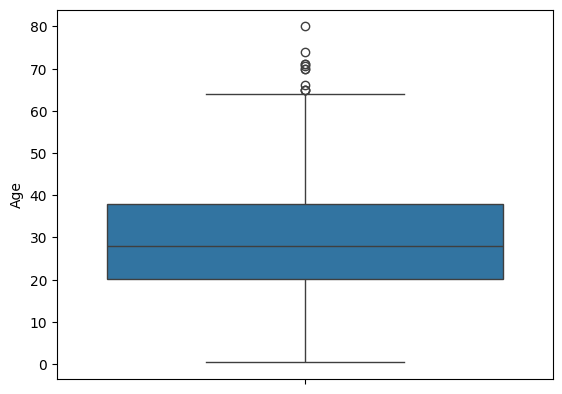

In [6]:
sns.boxplot(df['Age'])

Outlayers are found, however mean and median are identified as almost nearby figures.

In [18]:
median_age=df['Age'].median()
median_age

28.0

In [8]:
average_age=df['Age'].mean()
average_age

29.69911764705882

In [23]:
df['Age'].fillna(median_age,inplace=True)


**Treating Null values in "Cabin" column**

In [11]:
df['Cabin'].fillna(method='bfill',inplace=True)

<ipython-input-11-cb92871d5724>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Cabin'].fillna(method='bfill',inplace=True)


In [19]:
df['Cabin'].fillna(method='ffill',inplace=True)

<ipython-input-19-7630c447a97d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Cabin'].fillna(method='ffill',inplace=True)


Using forward fill or backward fill wont be ideal to fill "Cabin" column as it wont treat the first row or last row data respectively.

In [24]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)

In [27]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Treating Null values in "Embarked" column**

In [25]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [29]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Rounding the values in "Age" column**

In [26]:
df["Age"]=df['Age'].round()

# **Getting some meaningfull insights using Visualisation**

# **1.Countplot of survived passengers**

In [35]:
plt.style.use('dark_background')

Text(0.5, 1.0, 'Countplot of survived passengers')

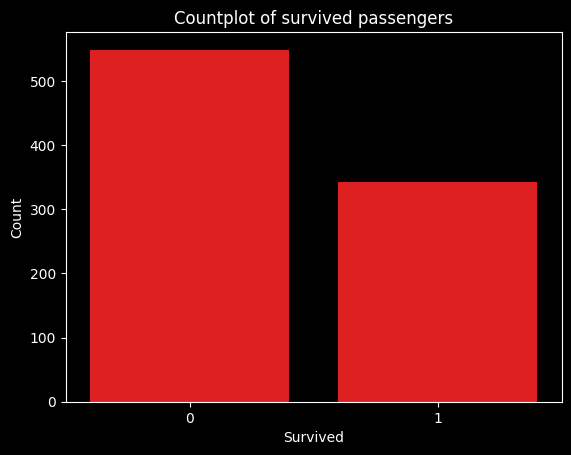

In [41]:
sns.countplot(x='Survived',data=df,color='red')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Countplot of survived passengers')


***It can be analysed that nearly 600 passengers have not survived!***

# **2.Histogram for Passenger Ages**

Text(0.5, 1.0, 'Distribution of Passenger Ages')

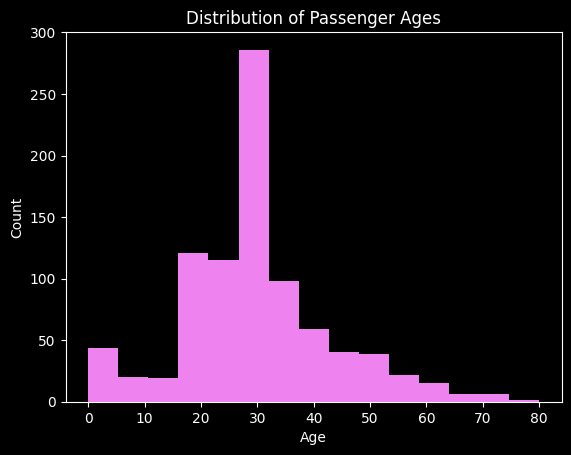

In [44]:
plt.hist(df['Age'], bins=15,color='violet')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passenger Ages')

**It can be seen that around 300 passengers were of age 30 among the passengers!**

# **3.Boxplot of Fare by Passenger Class**

Text(0, 0.5, 'Fare')

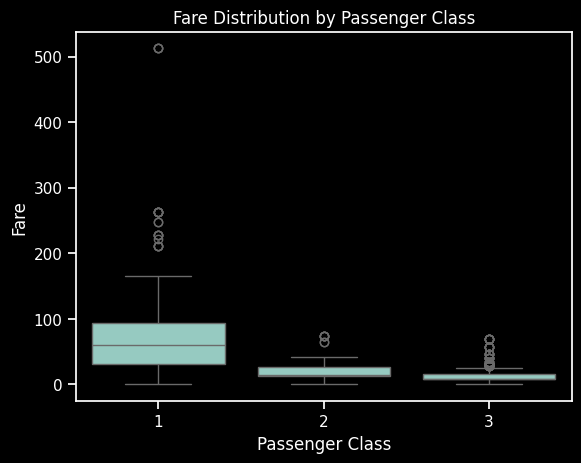

In [50]:
sns.set_theme(style="ticks")
plt.style.use('dark_background')
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

**it is understood that, 1st class passengers are having high fairs compared to other 2 classes. Outlayers are also seen on all classes as it shows the demand for the oceanic exploration journey at that time.**

# **4. Barplot of Survival Rate by Passenger Class**

Text(0, 0.5, 'Survival Rate')

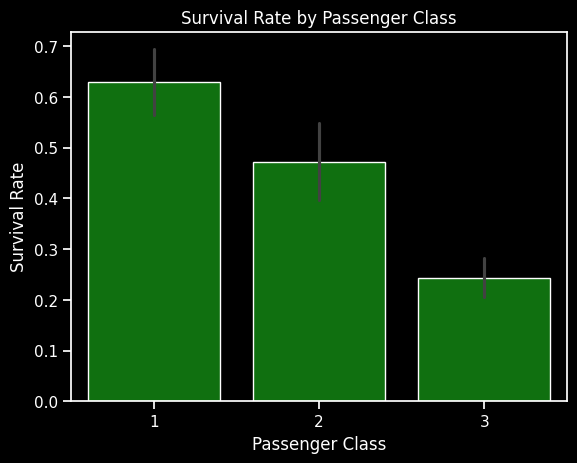

In [52]:
sns.barplot(x='Pclass', y='Survived', data=df, color='green')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

**It is understood that, survival rate of 1st class passengers is high. This shows the security assured in 1st class.**

# **5. Countplot of Embarked Port by Survival**

Text(0, 0.5, 'Count')

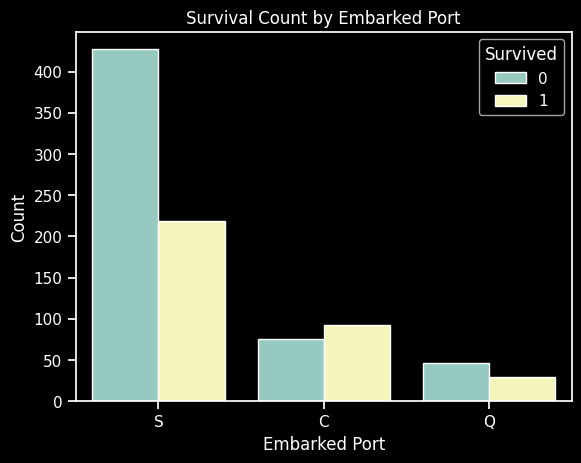

In [54]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')

**Most number of passengers both survived and not survived are embarked from the port named "S"!**

# **6. Scatterplot of Age vs Fare, Colored by Survival**

Text(0, 0.5, 'Fare')

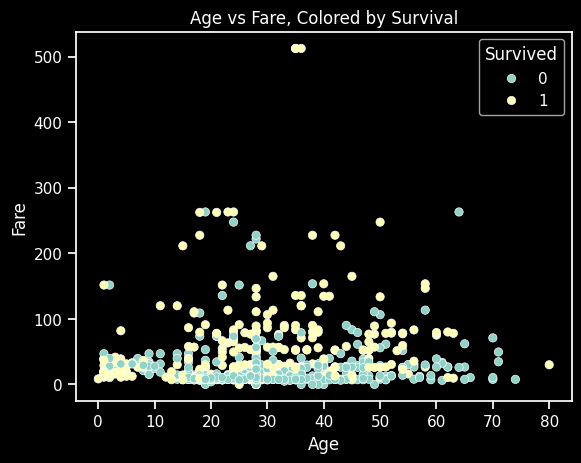

In [55]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare, Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')

**It is understood that, most number of points are scattered between the age group 20-40 and are of fare below hundred!**

# **7. Violinplot of Age by Sex and Survival**

Text(0, 0.5, 'Age')

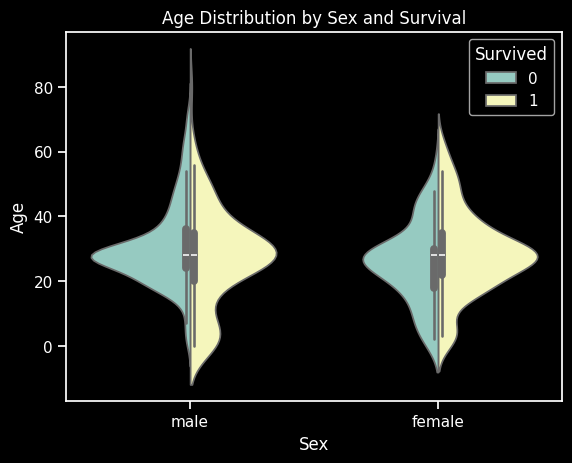

In [57]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)
plt.title('Age Distribution by Sex and Survival')
plt.xlabel('Sex')
plt.ylabel('Age')

**It is analysed that most number of male and female passengers survived are of the age group 20-40!**

# **8. Distribution of Passenger Classes**

Text(0.5, 1.0, 'Distribution of Passenger Classes')

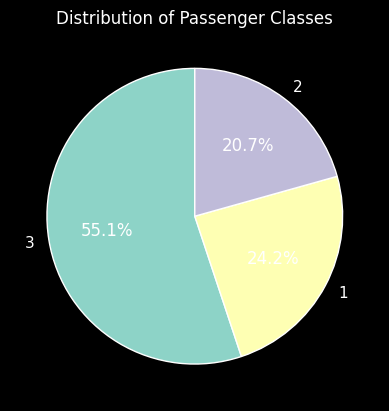

In [65]:
class_counts = df['Pclass'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passenger Classes')

**It is analysed that 55.1% of passengers are of 3rd class category**

# **9.Proportion of Male and Female Passengers**

Text(0.5, 1.0, 'Proportion of Male and Female Passengers')

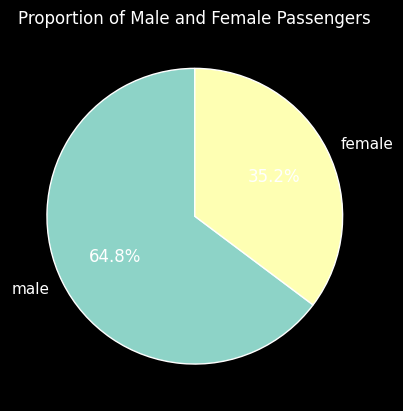

In [64]:
gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Male and Female Passengers')

**64.8% of passengers are of male!**

# **10. Line chart for Age based survival rate**

Text(0.5, 1.0, 'Survival Rate by Age')

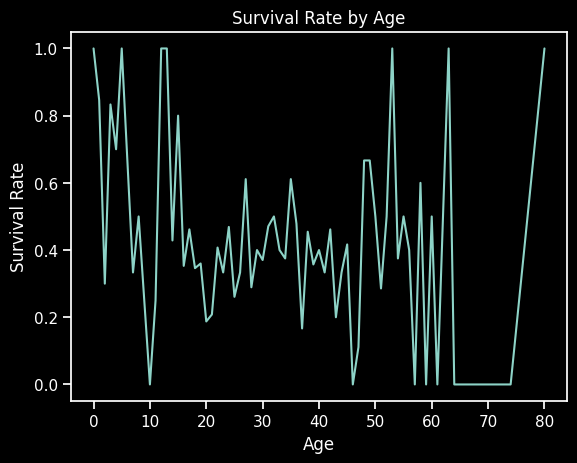

In [66]:
age_survival = df.groupby('Age')['Survived'].mean()

plt.plot(age_survival.index, age_survival.values)
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age')

**It can be analysed that, childrens and senior citizens are having highest survival rate!**

In [67]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')